*Source of the case study:* https://8weeksqlchallenge.com/case-study-5/

---

## Case Study #5 - Data Mart

**Introduction**
<br>Data Mart is Danny’s latest venture and after running international operations for his online supermarket that specialises in fresh produce - Danny is asking for your support to analyse his sales performance.

In June 2020 - large scale supply changes were made at Data Mart. All Data Mart products now use sustainable packaging methods in every single step from the farm all the way to the customer.

Danny needs your help to quantify the impact of this change on the sales performance for Data Mart and it’s separate business areas.

The key business question he wants you to help him answer are the following:
- What was the quantifiable impact of the changes introduced in June 2020?
- Which platform, region, segment and customer types were the most impacted by this change?
- What can we do about future introduction of similar sustainability updates to the business to minimise impact on sales?

**Available Data**
<br>For this case study there is only a single table: `data_mart.weekly_sales`.

**Entity Relationship Diagram**
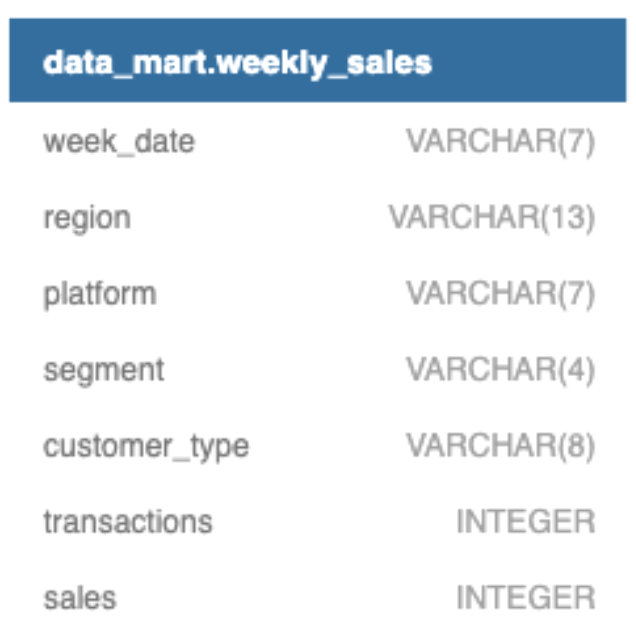

**Column Dictionary**
<br>The columns are pretty self-explanatory based on the column names but here are some further details about the dataset:

1. Data Mart has international operations using a multi-`region` strategy
1. Data Mart has both, a retail and online `platform` in the form of a Shopify store front to serve their customers
1. Customer `segment` and `customer_type` data relates to personal age and demographics information that is shared with Data Mart
1. `transactions` is the count of unique purchases made through Data Mart and `sales` is the actual dollar amount of purchases

Each record in the dataset is related to a specific aggregated slice of the underlying sales data rolled up into a `week_date` value which represents the start of the sales week.

**Case Study Questions**
<br>The following case study questions require some data cleaning steps before we start to unpack Danny’s key business questions in more depth.

**1. Data Cleansing Steps**
<br>In a single query, perform the following operations and generate a new table in the `data_mart` schema named `clean_weekly_sales`:
- Convert the `week_date` to a `DATE` format
- Add a `week_number` as the second column for each `week_date` value, for example any value from the 1st of January to 7th of January will be 1, 8th to 14th will be 2 etc
- Add a `month_number` with the calendar month for each `week_date` value as the 3rd column
- Add a `calendar_year` column as the 4th column containing either 2018, 2019 or 2020 values
- Add a new column called `age_band` after the original segment column using the following mapping on the number inside the segment value:
| segment | age_band |
| ----------- | --------- |
| 1 | Young Adults |
| 2 | Middle Aged |
| 3 or 4 | Retirees |
- Add a new `demographic` column using the following mapping for the first letter in the `segment` values:
| segment	| demographic |
| ----------- | --------- |
| C	| Couples |
| F	| Families |
- Ensure all `null` string values with an `"unknown"` string value in the original `segment` column as well as the new `age_band` and `demographic` columns
- Generate a new `avg_transaction` column as the `sales` value divided by `transactions` rounded to 2 decimal places for each record.

**2. Data Exploration**
1. What day of the week is used for each `week_date` value?
1. What range of week numbers are missing from the dataset?
1. How many total transactions were there for each year in the dataset?
1. What is the total sales for each region for each month?
1. What is the total count of transactions for each platform
1. What is the percentage of sales for Retail vs Shopify for each month?
1. What is the percentage of sales by demographic for each year in the dataset?
1. Which `age_band` and `demographic` values contribute the most to Retail sales?
1. Can we use the `avg_transaction` column to find the average transaction size for each year for Retail vs Shopify? If not - how would you calculate it instead?

**3. Before & After Analysis**
<br>This technique is usually used when we inspect an important event and want to inspect the impact before and after a certain point in time.

Taking the `week_date` value of `2020-06-15` as the baseline week where the Data Mart sustainable packaging changes came into effect.

We would include all `week_date` values for `2020-06-15` as the start of the period **after** the change and the previous `week_date` values would be **before**.

Using this analysis approach - answer the following questions:
1. What is the total sales for the 4 weeks before and after `2020-06-15`? What is the growth or reduction rate in actual values and percentage of sales?
1. What about the entire 12 weeks before and after?
1. How do the sale metrics for these 2 periods before and after compare with the previous years in 2018 and 2019?

**4. Bonus Question**
<br>Which areas of the business have the highest negative impact in sales metrics performance in 2020 for the 12 week before and after period?
- `region`
- `platform`
- `age_band`
- `demographic`
- `customer_type`

Do you have any further recommendations for Danny’s team at Data Mart or any interesting insights based off this analysis?

---

**1. Data Cleansing Steps**

Let's convert the `week_date` column to a `DATE` format:

**Query #1**

    ALTER TABLE data_mart.weekly_sales
    ALTER COLUMN week_date TYPE DATE
    USING to_date(week_date, 'DD-MM-YY');

There are no results to be displayed.

Then let's create `clean_weekly_sales` table performing all the required data cleansing steps:

**Query #2**

    CREATE TEMP TABLE clean_weekly_sales AS
    (SELECT week_date,
     		EXTRACT(WEEK FROM week_date) AS week_number,
     		EXTRACT(MONTH FROM week_date) AS month_number,
     		EXTRACT(YEAR FROM week_date) AS calendar_year,
     		region,
     		segment,
     		CASE WHEN segment ILIKE '%1' THEN 'Young Adults'
     			 WHEN segment ILIKE '%2' THEN 'Middle Aged'
     			 WHEN segment ILIKE '%3' OR segment ILIKE '%4' THEN 'Retirees'
     			 ELSE 'unknown'
     		END AS age_band,
     		CASE WHEN segment ILIKE 'C%' THEN 'Couples'
     			 WHEN segment ILIKE 'F%' THEN 'Families'
     			 ELSE 'unknown'
     		END AS demographic,
     		customer_type,
     		transactions,
     		sales,
     		ROUND(sales::numeric/transactions, 2) AS avg_transaction
     FROM data_mart.weekly_sales);

There are no results to be displayed.

**Query #3**

    SELECT *
    FROM clean_weekly_sales
    LIMIT 10;

| week_date                | week_number | month_number | calendar_year | region | platform | segment | age_band     | demographic | customer_type | transactions | sales    | avg_transaction |
| ------------------------ | ----------- | ------------ | ------------- | ------ | -------- | ------- | ------------ | ----------- | ------------- | ------------ | -------- | --------------- |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | ASIA   | Retail   | C3      | Retirees     | Couples     | New           | 120631       | 3656163  | 30.31           |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | ASIA   | Retail   | F1      | Young Adults | Families    | New           | 31574        | 996575   | 31.56           |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | USA    | Retail   | null    | unknown      | unknown     | Guest         | 529151       | 16509610 | 31.20           |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | EUROPE | Retail   | C1      | Young Adults | Couples     | New           | 4517         | 141942   | 31.42           |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | AFRICA | Retail   | C2      | Middle Aged  | Couples     | New           | 58046        | 1758388  | 30.29           |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | CANADA | Shopify  | F2      | Middle Aged  | Families    | Existing      | 1336         | 243878   | 182.54          |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | AFRICA | Shopify  | F3      | Retirees     | Families    | Existing      | 2514         | 519502   | 206.64          |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | ASIA   | Shopify  | F1      | Young Adults | Families    | Existing      | 2158         | 371417   | 172.11          |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | AFRICA | Shopify  | F2      | Middle Aged  | Families    | New           | 318          | 49557    | 155.84          |
| 2020-08-31T00:00:00.000Z | 36          | 8            | 2020          | AFRICA | Retail   | C3      | Retirees     | Couples     | New           | 111032       | 3888162  | 35.02           |

---


**2. Data Exploration**

**2.1. What day of the week is used for each `week_date` value?**

**Query #4**

    SELECT DISTINCT EXTRACT(DOW FROM week_date) AS day_of_week
    FROM clean_weekly_sales;

| day_of_week |
| ----------- |
| 1           |

Therefore, for each `week_date` value was used Monday, which represents the start of the sales week.

---

**2.2. What range of week numbers are missing from the dataset?**

**Query #5**

    SELECT *
    FROM  generate_series(1, 53)
    WHERE generate_series NOT IN (SELECT DISTINCT week_number FROM clean_weekly_sales);

| generate_series |
| --------------- |
| 1               |
| 2               |
| 3               |
| 4               |
| 5               |
| 6               |
| 7               |
| 8               |
| 9               |
| 10              |
| 11              |
| 12              |
| 37              |
| 38              |
| 39              |
| 40              |
| 41              |
| 42              |
| 43              |
| 44              |
| 45              |
| 46              |
| 47              |
| 48              |
| 49              |
| 50              |
| 51              |
| 52              |
| 53              |

The following range of week numbers are missing from the dataset: 1-12 and 37-53.

---

**2.3. How many total transactions were there for each year in the dataset?**

**Query #6**

    SELECT calendar_year,
    	   SUM(transactions) AS transactions_cnt
    FROM clean_weekly_sales
    GROUP BY 1;

| calendar_year | transactions_cnt |
| ------------- | ---------------- |
| 2018          | 346406460        |
| 2019          | 365639285        |
| 2020          | 375813651        |

From the table above we can see that the number of yearly transactions increased every year.

---

**2.4. What is the total sales amount for each region for each month?**

**Query #7**

    SELECT region,
    	   month_number,
           SUM(sales) AS total_sales
    FROM clean_weekly_sales
    GROUP BY 1, 2
    ORDER BY 3 DESC;

| region        | month_number | total_sales |
| ------------- | ------------ | ----------- |
| OCEANIA       | 4            | 2599767620  |
| OCEANIA       | 7            | 2563459400  |
| OCEANIA       | 8            | 2432313652  |
| OCEANIA       | 6            | 2371884744  |
| OCEANIA       | 5            | 2215657304  |
| AFRICA        | 7            | 1960219710  |
| AFRICA        | 4            | 1911783504  |
| AFRICA        | 8            | 1809596890  |
| ASIA          | 4            | 1804628707  |
| ASIA          | 7            | 1768844756  |
| AFRICA        | 6            | 1767559760  |
| ASIA          | 8            | 1663320609  |
| AFRICA        | 5            | 1647244738  |
| ASIA          | 6            | 1619482889  |
| ASIA          | 5            | 1526285399  |
| OCEANIA       | 3            | 783282888   |
| USA           | 7            | 760331754   |
| USA           | 4            | 759786323   |
| USA           | 8            | 712002790   |
| USA           | 6            | 703878990   |
| USA           | 5            | 655967121   |
| AFRICA        | 3            | 567767480   |
| ASIA          | 3            | 529770793   |
| CANADA        | 4            | 484552594   |
| CANADA        | 7            | 477134947   |
| CANADA        | 8            | 447073019   |
| CANADA        | 6            | 443846698   |
| CANADA        | 5            | 412378365   |
| OCEANIA       | 9            | 372465518   |
| AFRICA        | 9            | 276320987   |
| ASIA          | 9            | 252836807   |
| SOUTH AMERICA | 4            | 238451531   |
| SOUTH AMERICA | 7            | 235582776   |
| USA           | 3            | 225353043   |
| SOUTH AMERICA | 8            | 221166052   |
| SOUTH AMERICA | 6            | 218247455   |
| SOUTH AMERICA | 5            | 201391809   |
| CANADA        | 3            | 144634329   |
| EUROPE        | 7            | 136757466   |
| EUROPE        | 4            | 127334255   |
| EUROPE        | 6            | 122813826   |
| EUROPE        | 8            | 122102995   |
| USA           | 9            | 110532368   |
| EUROPE        | 5            | 109338389   |
| SOUTH AMERICA | 3            | 71023109    |
| CANADA        | 9            | 69067959    |
| EUROPE        | 3            | 35337093    |
| SOUTH AMERICA | 9            | 34175583    |
| EUROPE        | 9            | 18877433    |

---

**2.5. What is the total count of transactions for each platform?**

**Query #8**

    SELECT platform,
    	   SUM(transactions) AS transactions_cnt
    FROM clean_weekly_sales
    GROUP BY 1;

| platform | transactions_cnt |
| -------- | ---------------- |
| Shopify  | 5925169          |
| Retail   | 1081934227       |

Many more transactions were made on platform Retail than on platform Shopify.

---

**2.6. What is the percentage of sales for Retail vs Shopify for each month?**

**Query #9**

    WITH t1 AS
    (SELECT month_number,
    	    SUM(sales) AS monthly_sales
    FROM clean_weekly_sales
    GROUP BY 1),
    t2 AS
    (SELECT month_number,
    	    platform,
            SUM(sales) AS platform_monthly_sales
    FROM clean_weekly_sales
    GROUP BY 1,2
    ORDER BY 1,2)
    SELECT t2.month_number,
    	   platform,
           ROUND(100*platform_monthly_sales::numeric/monthly_sales, 2) AS sales_percentage
    FROM t2
    LEFT JOIN t1 ON t1.month_number=t2.month_number;

| month_number | platform | sales_percentage |
| ------------ | -------- | ---------------- |
| 3            | Retail   | 97.54            |
| 3            | Shopify  | 2.46             |
| 4            | Retail   | 97.59            |
| 4            | Shopify  | 2.41             |
| 5            | Retail   | 97.30            |
| 5            | Shopify  | 2.70             |
| 6            | Retail   | 97.27            |
| 6            | Shopify  | 2.73             |
| 7            | Retail   | 97.29            |
| 7            | Shopify  | 2.71             |
| 8            | Retail   | 97.08            |
| 8            | Shopify  | 2.92             |
| 9            | Retail   | 97.38            |
| 9            | Shopify  | 2.62             |

---

**2.7. What is the percentage of sales by demographic for each year in the dataset?**

**Query #10**

    WITH t1 AS
    (SELECT calendar_year,
    	    SUM(sales) AS yearly_sales
    FROM clean_weekly_sales
    GROUP BY 1),
    t2 AS
    (SELECT calendar_year,
    	    demographic,
            SUM(sales) AS demographic_yearly_sales
    FROM clean_weekly_sales
    GROUP BY 1,2
    ORDER BY 1,2)
    SELECT t2.calendar_year,
    	   demographic,
           ROUND(100*demographic_yearly_sales::numeric/yearly_sales, 2) AS sales_percentage
    FROM t2
    LEFT JOIN t1 ON t1.calendar_year=t2.calendar_year;

| calendar_year | demographic | sales_percentage |
| ------------- | ----------- | ---------------- |
| 2018          | Couples     | 26.38            |
| 2018          | Families    | 31.99            |
| 2018          | unknown     | 41.63            |
| 2019          | Couples     | 27.28            |
| 2019          | Families    | 32.47            |
| 2019          | unknown     | 40.25            |
| 2020          | Couples     | 28.72            |
| 2020          | Families    | 32.73            |
| 2020          | unknown     | 38.55            |

---

**2.8. Which `age_band` and `demographic` values contribute the most to Retail sales?**

**Query #11**

    SELECT age_band,
    	   demographic,
           SUM(sales) AS retail_sales,
           ROUND(100*SUM(sales)::numeric / SUM(SUM(sales)) OVER(), 2) AS retail_sales_percentage
    FROM clean_weekly_sales
    WHERE platform = 'Retail'
    GROUP BY 1,2
    ORDER BY 3 DESC;

| age_band     | demographic | retail_sales | retail_sales_percentage |
| ------------ | ----------- | ------------ | ----------------------- |
| unknown      | unknown     | 16067285533  | 40.52                   |
| Retirees     | Families    | 6634686916   | 16.73                   |
| Retirees     | Couples     | 6370580014   | 16.07                   |
| Middle Aged  | Families    | 4354091554   | 10.98                   |
| Young Adults | Couples     | 2602922797   | 6.56                    |
| Middle Aged  | Couples     | 1854160330   | 4.68                    |
| Young Adults | Families    | 1770889293   | 4.47                    |

As we can see, 'unknown' values contributed the most to Retail sales.
<br>Then Retirees Families and Retirees Couples contributed around 16.73% and 16.07% accordingly to Retail sales.
<br>The least contribution to Retail sales was made by Young Adults and Middle Aged: 4.47 and 4.68 accordingly.

**2.9. Can we use the `avg_transaction` column to find the average transaction size for each year for Retail vs Shopify? If not - how would you calculate it instead?**

It is not entirely correct to use the `avg_transaction` column to find the average transaction size for each year for Retail vs Shopify. Instead it is better to calculate average transaction size based on specific features like `calendar_year` and	`platform` (average for the group) rather then on individual transactions.
<br>Let's compare these two options:

**Query #12**

    SELECT calendar_year,
    	   platform,
    	   ROUND(AVG(avg_transaction), 2) AS avg_transaction,
           ROUND(SUM(sales)::numeric / SUM(transactions), 2) AS avg_transaction_size
    FROM clean_weekly_sales
    GROUP BY 1, 2
    ORDER BY 1, 2;

| calendar_year | platform | avg_transaction | avg_transaction_size |
| ------------- | -------- | --------------- | -------------------- |
| 2018          | Retail   | 42.91           | 36.56                |
| 2018          | Shopify  | 188.28          | 192.48               |
| 2019          | Retail   | 41.97           | 36.83                |
| 2019          | Shopify  | 177.56          | 183.36               |
| 2020          | Retail   | 40.64           | 36.56                |
| 2020          | Shopify  | 174.87          | 179.03               |

---

**3. Before & After Analysis**

Taking the `week_date` value of `2020-06-15` as the baseline week where the Data Mart sustainable packaging changes came into effect.

We would include all `week_date` values for `2020-06-15` as the start of the period after the change and the previous `week_date` values would be before.

**3.1. What is the total sales for the 4 weeks before and after `2020-06-15`? What is the growth or reduction rate in actual values and percentage of sales?**

**Query #13**

    WITH t AS
    (SELECT SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 4) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_4weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 3) THEN sales
           		     ELSE 0
    	        END) AS sales_4weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020)
    SELECT *,
    	   (sales_4weeks_after - sales_4weeks_before) AS sales_reduction,
           ROUND(100*(sales_4weeks_after::numeric / sales_4weeks_before - 1),2) AS sales_reduction_percentage
    FROM t;

| sales_4weeks_before | sales_4weeks_after | sales_reduction | sales_reduction_percentage |
| ------------------- | ------------------ | --------------- | -------------------------- |
| 2345878357          | 2318994169         | -26884188       | -1.15                      |

Therefore, we can see slight sales reduction after Data Mart implemented sustainable packaging changes by 1.15%.
<br>It can be due to the fact that customers were not aware of the changes and couldn't identify the packaging.

---

**3.2. What about the entire 12 weeks before and after?**

**Query #14**

    WITH t AS
    (SELECT SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_reduction,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_reduction_percentage
    FROM t;

| sales_12weeks_before | sales_12weeks_after | sales_reduction | sales_reduction_percentage |
| -------------------- | ------------------- | --------------- | -------------------------- |
| 7126273147           | 6973947753          | -152325394      | -2.14                      |

Therefore, there were reduction in sales by 2.14% for 12 weeks after Data Mart implemented sustainable packaging changes in comparison with 12 weeks period before the changes. 

---

**3.3. How do the sale metrics for these 2 periods before and after compare with the previous years in 2018 and 2019?**

- for 4 weeks period:

**Query #15**

    WITH t AS
    (SELECT calendar_year,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 4) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_4weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 3) THEN sales
           		     ELSE 0
    	        END) AS sales_4weeks_after     
    FROM clean_weekly_sales
    GROUP BY 1)
    SELECT *,
    	   (sales_4weeks_after - sales_4weeks_before) AS sales_change,
           ROUND(100*(sales_4weeks_after::numeric / sales_4weeks_before - 1),2) AS sales_change_percentage
    FROM t;

| calendar_year | sales_4weeks_before | sales_4weeks_after | sales_change | sales_change_percentage |
| ------------- | ------------------- | ------------------ | ------------ | ----------------------- |
| 2018          | 2125140809          | 2129242914         | 4102105      | 0.19                    |
| 2019          | 2249989796          | 2252326390         | 2336594      | 0.10                    |
| 2020          | 2345878357          | 2318994169         | -26884188    | -1.15                   |

- for 12 weeks period:

**Query #16**

    WITH t AS
    (SELECT calendar_year,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    GROUP BY 1)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_change,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_change_percentage
    FROM t;

| calendar_year | sales_12weeks_before | sales_12weeks_after | sales_change | sales_change_percentage |
| ------------- | -------------------- | ------------------- | ------------ | ----------------------- |
| 2018          | 6396562317           | 6500818510          | 104256193    | 1.63                    |
| 2019          | 6883386397           | 6862646103          | -20740294    | -0.30                   |
| 2020          | 7126273147           | 6973947753          | -152325394   | -2.14                   |

As we can see from the tables above, there were a tendency of sales reduction in the second part of a period (after the date) year by year. In other words, the sales growth was faster in the 4 weeks period before the date rather than in the 4 weeks period after the date.
<br>In the 12 weeks period analysis we can see that there were reduction in sales as well.
<br>Therefore the observed decrease in sales in 2020 may be due to some kind of seasonality rather than changes in packaging.

---

**4. Bonus Question**

**Which areas of the business have the highest negative impact in sales metrics performance in 2020 for the 12 weeks before and after period?**
- `region`
- `platform`
- `age_band`
- `demographic`
- `customer_type`

**Do you have any further recommendations for Danny’s team at Data Mart or any interesting insights based off this analysis?**

Let's explore impact of every factor:

- `region`:

**Query #17**

    WITH t AS
    (SELECT region,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020
    GROUP BY 1)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_reduction,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_reduction_percentage
    FROM t
    ORDER BY 4;

| region        | sales_12weeks_before | sales_12weeks_after | sales_reduction | sales_reduction_percentage |
| ------------- | -------------------- | ------------------- | --------------- | -------------------------- |
| OCEANIA       | 2354116790           | 2282795690          | -71321100       | -3.03                      |
| ASIA          | 1637244466           | 1583807621          | -53436845       | -3.26                      |
| USA           | 677013558            | 666198715           | -10814843       | -1.60                      |
| AFRICA        | 1709537105           | 1700390294          | -9146811        | -0.54                      |
| CANADA        | 426438454            | 418264441           | -8174013        | -1.92                      |
| SOUTH AMERICA | 213036207            | 208452033           | -4584174        | -2.15                      |
| EUROPE        | 108886567            | 114038959           | 5152392         | 4.73                       |

The highest negative impact in sales metrics performance in 2020 for the 12 weeks before and after period across all regions had  **OCEANIA** (in absolute values). The only region that had a positive impact on sales was EUROPE.

- `platform`:

**Query #18**

    WITH t AS
    (SELECT platform,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020
    GROUP BY 1)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_reduction,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_reduction_percentage
    FROM t
    ORDER BY 4;

| platform | sales_12weeks_before | sales_12weeks_after | sales_reduction | sales_reduction_percentage |
| -------- | -------------------- | ------------------- | --------------- | -------------------------- |
| Retail   | 6906861113           | 6738777279          | -168083834      | -2.43                      |
| Shopify  | 219412034            | 235170474           | 15758440        | 7.18                       |

The highest negative impact in sales metrics performance in 2020 for the 12 weeks before and after period across all platforms had  **Retail platform** (in absolute values). Another platform - Shopify - had a positive impact on sales.

- `age_band`:

**Query #19**

    WITH t AS
    (SELECT age_band,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020
    GROUP BY 1)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_reduction,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_reduction_percentage
    FROM t
    ORDER BY 4;

| age_band     | sales_12weeks_before | sales_12weeks_after | sales_reduction | sales_reduction_percentage |
| ------------ | -------------------- | ------------------- | --------------- | -------------------------- |
| unknown      | 2764354464           | 2671961443          | -92393021       | -3.34                      |
| Retirees     | 2395264515           | 2365714994          | -29549521       | -1.23                      |
| Middle Aged  | 1164847640           | 1141853348          | -22994292       | -1.97                      |
| Young Adults | 801806528            | 794417968           | -7388560        | -0.92                      |

The highest negative impact in sales metrics performance in 2020 for the 12 weeks before and after period across all age bands had  **unknown band** (in absolute values), and from known bands - **Retirees**.

- `demographic`:

**Query #20**

    WITH t AS
    (SELECT demographic,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020
    GROUP BY 1)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_reduction,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_reduction_percentage
    FROM t
    ORDER BY 4;

| demographic | sales_12weeks_before | sales_12weeks_after | sales_reduction | sales_reduction_percentage |
| ----------- | -------------------- | ------------------- | --------------- | -------------------------- |
| unknown     | 2764354464           | 2671961443          | -92393021       | -3.34                      |
| Families    | 2328329040           | 2286009025          | -42320015       | -1.82                      |
| Couples     | 2033589643           | 2015977285          | -17612358       | -0.87                      |

The highest negative impact in sales metrics performance in 2020 for the 12 weeks before and after period across all demographics had  **unknown demographic** (in absolute values), and from known demographic - **Families**. 

- `customer_type`:

**Query #21**

    WITH t AS
    (SELECT customer_type,
     		SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 12) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) - 1) THEN sales
    			     ELSE 0
    	        END) AS sales_12weeks_before,
            SUM(CASE WHEN week_number BETWEEN (EXTRACT(WEEK FROM '2020-06-15'::timestamp)) AND (EXTRACT(WEEK FROM '2020-06-15'::timestamp) + 11) THEN sales
           		     ELSE 0
    	        END) AS sales_12weeks_after     
    FROM clean_weekly_sales
    WHERE calendar_year = 2020
    GROUP BY 1)
    SELECT *,
    	   (sales_12weeks_after - sales_12weeks_before) AS sales_reduction,
           ROUND(100*(sales_12weeks_after::numeric / sales_12weeks_before - 1),2) AS sales_reduction_percentage
    FROM t
    ORDER BY 4;

| customer_type | sales_12weeks_before | sales_12weeks_after | sales_reduction | sales_reduction_percentage |
| ------------- | -------------------- | ------------------- | --------------- | -------------------------- |
| Existing      | 3690116427           | 3606243454          | -83872973       | -2.27                      |
| Guest         | 2573436301           | 2496233635          | -77202666       | -3.00                      |
| New           | 862720419            | 871470664           | 8750245         | 1.01                       |

The highest negative impact in sales metrics performance in 2020 for the 12 weeks before and after period across all customer types had  **Existing customers** (in absolute values). The only customer type that had a positive impact on sales was New customer type.

---

Overall the most significant factor was plaform: Retail platform was the most impacted by the change of sustainable packaging methods implemented in June 2020.

---

In the future it is better to announce about similar sustainability updates to your existing or potential customers through different channels. This can make them aware of those changes and help them find your products in stores.

---